In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Purnia-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,15.82,0.0,1,1,2011,78.25,183.12,1.66
1,1,14.05,0.0,2,1,2011,69.50,280.00,1.92
2,2,14.34,1.0,3,1,2011,61.12,205.12,0.83
3,3,13.26,1.0,4,1,2011,66.94,290.38,1.36
4,4,12.48,1.0,5,1,2011,68.44,283.50,1.42
...,...,...,...,...,...,...,...,...,...
3738,3738,28.02,1.0,27,3,2021,18.56,274.44,1.84
3739,3739,29.51,0.0,28,3,2021,20.31,268.56,1.34
3740,3740,30.54,0.0,29,3,2021,19.06,164.31,1.12
3741,3741,29.12,0.0,30,3,2021,29.19,154.69,2.20


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.27780816])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.277808
dtype: float64

<AxesSubplot:>

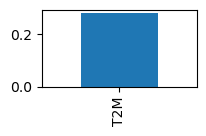

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 1815, 1.0: 1179})
The number of classes after fit Counter({1.0: 1815, 0.0: 1815})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[388  66]
 [ 54 241]]
0.8397863818424566
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       454
         1.0       0.79      0.82      0.80       295

    accuracy                           0.84       749
   macro avg       0.83      0.84      0.83       749
weighted avg       0.84      0.84      0.84       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8357873516015829

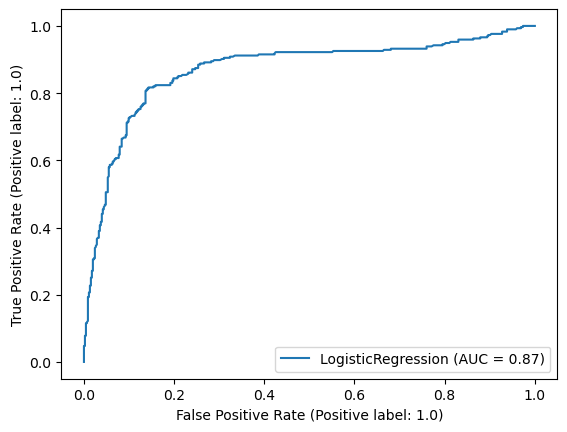

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[392  62]
 [ 60 235]]
0.8371161548731643
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       454
         1.0       0.79      0.80      0.79       295

    accuracy                           0.84       749
   macro avg       0.83      0.83      0.83       749
weighted avg       0.84      0.84      0.84       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8300231464197716

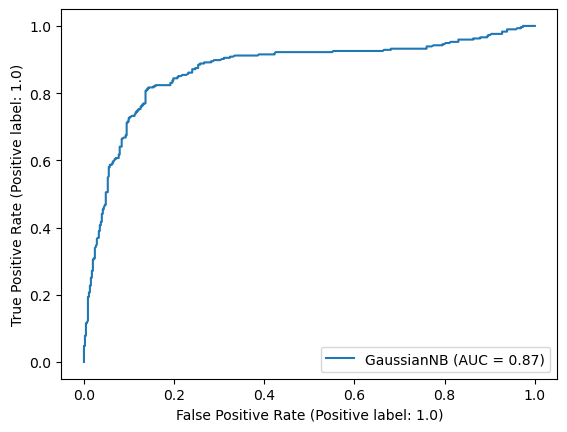

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[366  88]
 [ 61 234]]
0.8010680907877169
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       454
         1.0       0.73      0.79      0.76       295

    accuracy                           0.80       749
   macro avg       0.79      0.80      0.79       749
weighted avg       0.81      0.80      0.80       749



In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.799693869932054

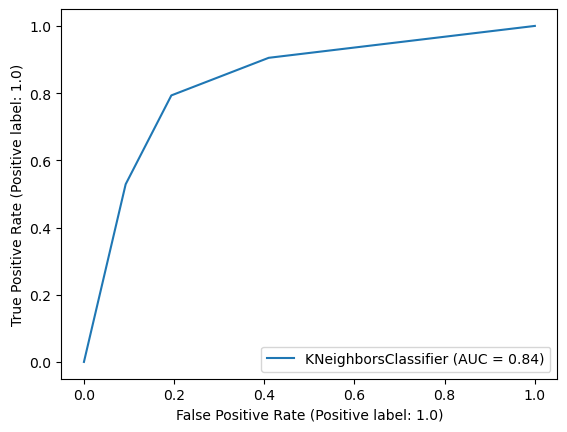

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[380  74]
 [ 52 243]]
0.8317757009345794
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       454
         1.0       0.77      0.82      0.79       295

    accuracy                           0.83       749
   macro avg       0.82      0.83      0.83       749
weighted avg       0.84      0.83      0.83       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8303666094228329

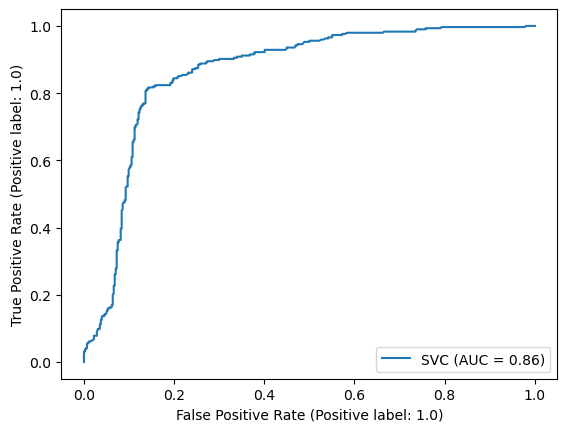

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[381  73]
 [ 52 243]]
0.8331108144192256
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       454
         1.0       0.77      0.82      0.80       295

    accuracy                           0.83       749
   macro avg       0.82      0.83      0.83       749
weighted avg       0.84      0.83      0.83       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[364  90]
 [ 80 215]]
0.7730307076101469
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       454
         1.0       0.70      0.73      0.72       295

    accuracy                           0.77       749
   macro avg       0.76      0.77      0.76       749
weighted avg       0.77      0.77      0.77       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7652878369297395

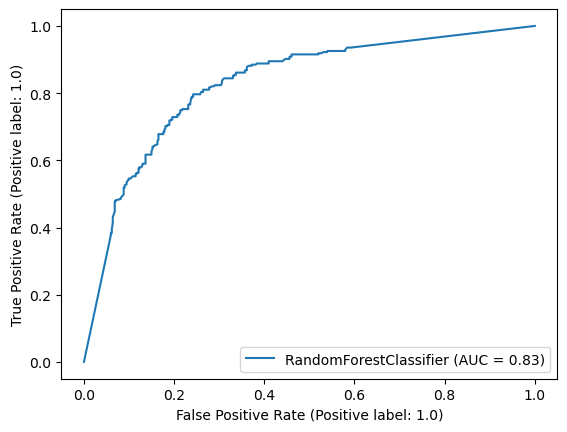

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.009462
0:	total: 49.2ms	remaining: 1m 38s
1:	total: 50.4ms	remaining: 50.4s
2:	total: 51.4ms	remaining: 34.2s
3:	total: 52.3ms	remaining: 26.1s
4:	total: 53.3ms	remaining: 21.2s
5:	total: 54.2ms	remaining: 18s
6:	total: 55.1ms	remaining: 15.7s
7:	total: 56.2ms	remaining: 14s
8:	total: 57.3ms	remaining: 12.7s
9:	total: 58.3ms	remaining: 11.6s
10:	total: 59.3ms	remaining: 10.7s
11:	total: 60.3ms	remaining: 9.98s
12:	total: 61.3ms	remaining: 9.37s
13:	total: 62.3ms	remaining: 8.84s
14:	total: 63.3ms	remaining: 8.38s
15:	total: 64.3ms	remaining: 7.97s
16:	total: 65.4ms	remaining: 7.63s
17:	total: 66.2ms	remaining: 7.29s
18:	total: 67.2ms	remaining: 7.01s
19:	total: 68.3ms	remaining: 6.76s
20:	total: 69.2ms	remaining: 6.52s
21:	total: 70.2ms	remaining: 6.31s
22:	total: 71.1ms	remaining: 6.11s
23:	total: 72.2ms	remaining: 5.95s
24:	total: 73.3ms	remaining: 5.79s
25:	total: 74.4ms	remaining: 5.65s
26:	total: 75.4ms	remaining: 5.51s
27:	total: 76.3ms	remaining: 5.37s
28:

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[379  75]
 [ 52 243]]
0.8304405874499332
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       454
         1.0       0.76      0.82      0.79       295

    accuracy                           0.83       749
   macro avg       0.82      0.83      0.82       749
weighted avg       0.83      0.83      0.83       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8292652878369298

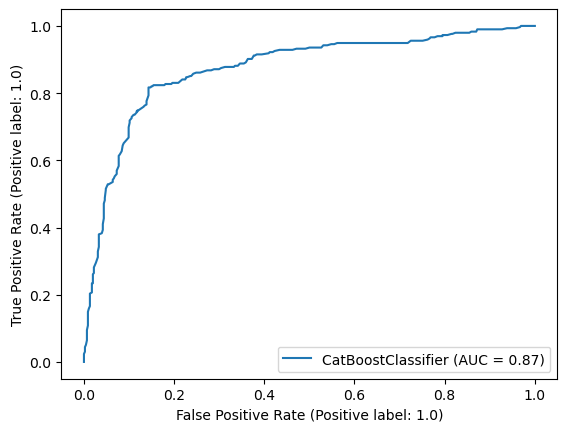

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']